In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import time
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [2]:
#df = pd.read_csv('/Users/Vicki/Library/CloudStorage/OneDrive-Emory/24-25/Spring 2025/QTM 347/calories.csv')
df = pd.read_csv('/Users/avusiri/Downloads/calories.csv')
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})
df.drop(['User_ID'], axis=1, inplace=True)
df


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,0,78,193.0,97.0,2.0,84.0,38.3,11.0


In [3]:
X = df.drop(['Calories'], axis=1)
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
bagging_model = RandomForestRegressor(n_estimators=500, random_state=42, oob_score=True)
bagging_model.fit(X_train, y_train)

y_pred_bagging = bagging_model.predict(X_test)
test_mse_bagging = mean_squared_error(y_test, y_pred_bagging)

print(f"Test MSE for Bagging: {test_mse_bagging}")

# Feature Importance
importances = bagging_model.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print("\nFeature Importances:")
feature_importances


Test MSE for Bagging: 6.916138568

Feature Importances:


Duration      0.914048
Heart_Rate    0.048105
Age           0.026350
Gender        0.006776
Weight        0.002985
Height        0.001248
Body_Temp     0.000489
dtype: float64

In [5]:
# R-squared
# Test Accuracy via MSE
# Training Accuracy via MSE
# MAE


In [6]:
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import accuracy_score


In [7]:
#Preductions on training data
y_train_pred = bagging_model.predict(X_train)

#MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_pred_bagging)

#MAE
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_pred_bagging)

# R^2
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_pred_bagging)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Training R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")


Training MSE: 1.0929336293333332
Test MSE: 6.916138568
Training MAE: 0.637364
Test MAE: 1.6695346666666664
Training R-squared: 0.9997172838314758
Test R-squared: 0.9982862993276923


In [8]:
from xgboost import XGBRegressor


In [9]:
#loading the model
boost_model = XGBRegressor(n_estimators=500)
#training the model with X_train
boost_model.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [10]:
y_pred_boost = boost_model.predict(X_test)

#MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_pred_boost)

#MAE
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_pred_boost)

# R^2
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_pred_boost)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Training R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")


Training MSE: 1.0929336293333332
Test MSE: 3.4537828599802753
Training MAE: 0.637364
Test MAE: 1.253790535847346
Training R-squared: 0.9997172838314758
Test R-squared: 0.9991442117662971


In [11]:
X_test


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
11499,1,45,154.0,52.0,26.0,107.0,40.6
6475,0,21,187.0,90.0,29.0,111.0,40.5
13167,0,58,176.0,77.0,11.0,90.0,40.0
862,0,35,182.0,89.0,24.0,108.0,40.8
5970,1,67,171.0,67.0,29.0,116.0,41.1
...,...,...,...,...,...,...,...
6216,1,61,166.0,66.0,28.0,106.0,41.0
3585,1,73,165.0,66.0,10.0,92.0,40.0
10023,1,38,169.0,66.0,20.0,104.0,40.2
14044,1,25,163.0,54.0,5.0,86.0,39.2


Adding Apple Watch Trial

In [12]:
data = {
    'Gender':     [1, 1, 1],
    'Age':        [21, 21, 21],
    'Height':     [172.7] * 3,    # directly using 172.7 cm
    'Weight':     [63.5] * 3,     # directly using 63.5 kg
    'Duration':   [40, 36, 36],
    'Heart_Rate': [101, 166, 121],
    'Body_Temp':  [40.5] * 3
}

aanya_test = pd.DataFrame(data)
print(aanya_test)



   Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0       1   21   172.7    63.5        40         101       40.5
1       1   21   172.7    63.5        36         166       40.5
2       1   21   172.7    63.5        36         121       40.5


In [13]:
aanya_pred_boost = boost_model.predict(aanya_test)
aanya_pred_boost

#I used total cals

aanya_apple = {
    'Calories': [169, 351, 196]
}

print(aanya_pred_boost)
print(aanya_apple)



[164.05278 233.72853 229.09926]
{'Calories': [169, 351, 196]}


In [14]:
print(np.mean(X_train['Heart_Rate']))
print(np.median(X_train['Heart_Rate']))


95.47591666666666
95.0


In [15]:
print(np.max(X_train['Heart_Rate']))


128.0


In [16]:
# Feature Importance
importances = boost_model.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print("\nFeature Importances:")
feature_importances



Feature Importances:


Duration      0.891348
Heart_Rate    0.048222
Gender        0.037311
Age           0.018500
Weight        0.004270
Height        0.000192
Body_Temp     0.000157
dtype: float32

Aanya Apple Watch Analysis

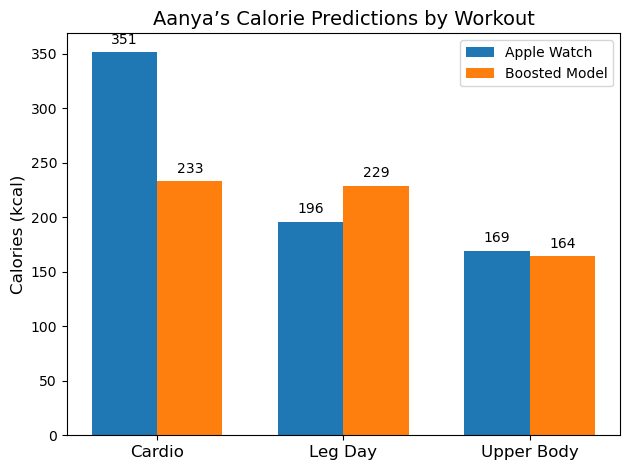

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data
workouts = ['Cardio', 'Leg Day', 'Upper Body']
watch_preds = [351, 196, 169]
model_preds = [233, 229, 164]

# Positions and width
x = np.arange(len(workouts))
width = 0.35

# Create plot
fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, watch_preds, width, color='#1f77b4', label='Apple Watch')
bar2 = ax.bar(x + width/2, model_preds, width, color='#ff7f0e', label='Boosted Model')

# Add value labels on bars
ax.bar_label(bar1, padding=4, fontsize=10)
ax.bar_label(bar2, padding=4, fontsize=10)

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(workouts, fontsize=12)
ax.set_ylabel('Calories (kcal)', fontsize=12)
ax.set_title("Aanya’s Calorie Predictions by Workout", fontsize=14)
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
pd.read_csv('/Users/Vicki/Library/CloudStorage/OneDrive-Emory/24-25/Spring 2025/QTM 347/activity_data_heartrate.csv')


,Id,Date,TotalSteps,TotalDistance,TotalActiveMinutes,Heart_rate,Calories
0,4558609924,2016-04-12,5135,3.39,318,76.639377,1909
1,4558609924,2016-04-14,6799,4.49,279,81.556556,1922
2,4558609924,2016-04-20,4803,3.17,222,76.923272,1788
3,4558609924,2016-04-24,8563,5.66,395,83.969233,2173
4,4558609924,2016-05-01,3428,2.27,190,70.841904,1692
...,...,...,...,...,...,...,...
329,6962181067,2016-04-17,10145,6.71,313,76.664489,2027
330,6962181067,2016-05-04,10147,6.71,335,79.474591,2086
331,6962181067,2016-04-16,13217,8.74,333,82.040182,2173
332,6775888955,2016-04-19,0,0.00,0,99.461538,1841


In [ ]:
rforest_model = RandomForestRegressor(random_state=42)

param_grid = {
    'max_features': [4,5,6],
    'n_estimators': [1100, 1150, 1200, 1250, 1300],


}
grid_search = GridSearchCV(estimator=rforest_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

rf_model = RandomForestRegressor(**grid_search.best_params_, random_state=42, oob_score=True)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
test_mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Test MSE for Random Forest: {test_mse_rf}")

test_mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Test MAE: {test_mae_rf}")

test_r2_rf = r2_score(y_test, y_pred_rf)
print(f"Test R-squared: {test_r2_rf}")

# Feature Importance
importances = rf_model.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print("\nFeature Importances:")
feature_importances


Best hyperparameters: {'max_features': 6, 'n_estimators': 1200}
Test MSE for Random Forest: 6.54698112199074
Test MAE: 1.6144886111111112
Test R-squared: 0.9983777702196059

Feature Importances:


Duration      0.802452
Heart_Rate    0.145167
Age           0.026435
Body_Temp     0.014741
Gender        0.006219
Weight        0.003572
Height        0.001414
dtype: float64